# Predicting the Popularity of Online News Articles using Random Forest Model

In [ ]:
# Mounting the Google Drive to fetch the News Article Statistics' Dataset from it
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Importing required packages and libraries for Data Assessment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

# Improting the required libraries for Model Training Tasks
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

%matplotlib inline

# Code segment to suppress the Warnings on Final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# Loading the Dataset from the Drive
df = pd.read_csv('/content/drive/MyDrive/Online_News_Popularity.csv')

# A snippet representation of the Dataset available
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
df.shape

(39644, 61)

In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [ ]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'lda_00',
       'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

### Exploratory Data Analysis

In [ ]:
def desc(title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    if title:
        plt.title(title)
    if xscale:
        plt.xscale(xscale)
    if yscale:
        plt.yscale(yscale)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    if xticks1:
        plt.xticks(xticks1, xticks2)
    if yticks1:
        plt.yticks(yticks1, yticks2)
    if legend_title:
        plt.legend(title=legend_title)
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels)

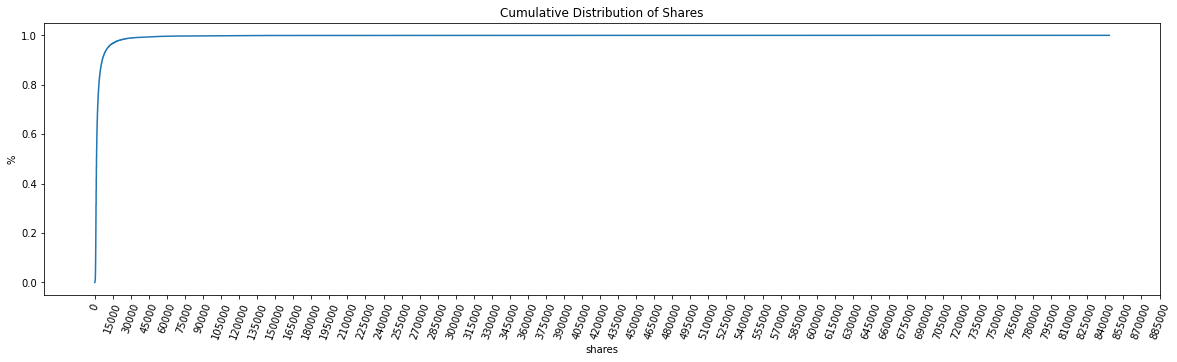

In [ ]:
def cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x, y = cdf(df.shares)

plt.figure(figsize=(20,5))
plt.plot(x, y)
plt.xticks(rotation=70)
desc(title = "Cumulative Distribution of Shares", xlabel='shares', ylabel='%', xticks1 = range(0, 900000, 15000))

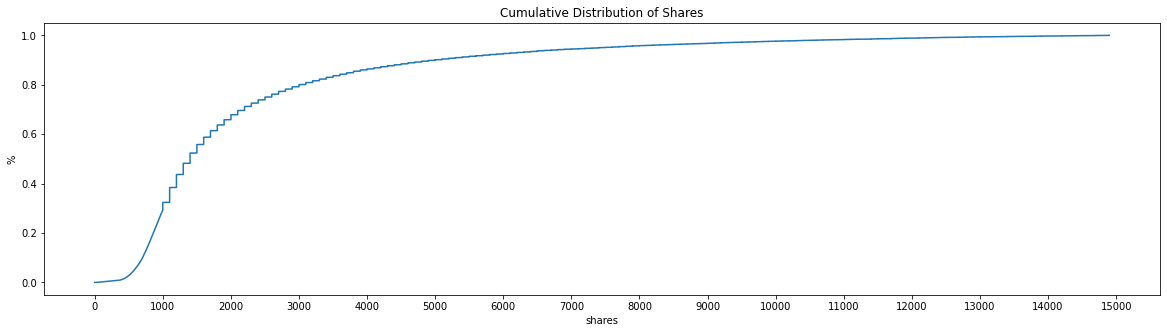

In [ ]:
df_majority = df[df.shares < 15000] 

# plot out the Cumulative Distribution of the dependant varible, shares.
x, y = cdf(df_majority.shares)

plt.figure(figsize=(20,5))
plt.plot(x, y)
desc(title = "Cumulative Distribution of Shares", xlabel='shares', ylabel='%', xticks1 = range(0, 16000, 1000));

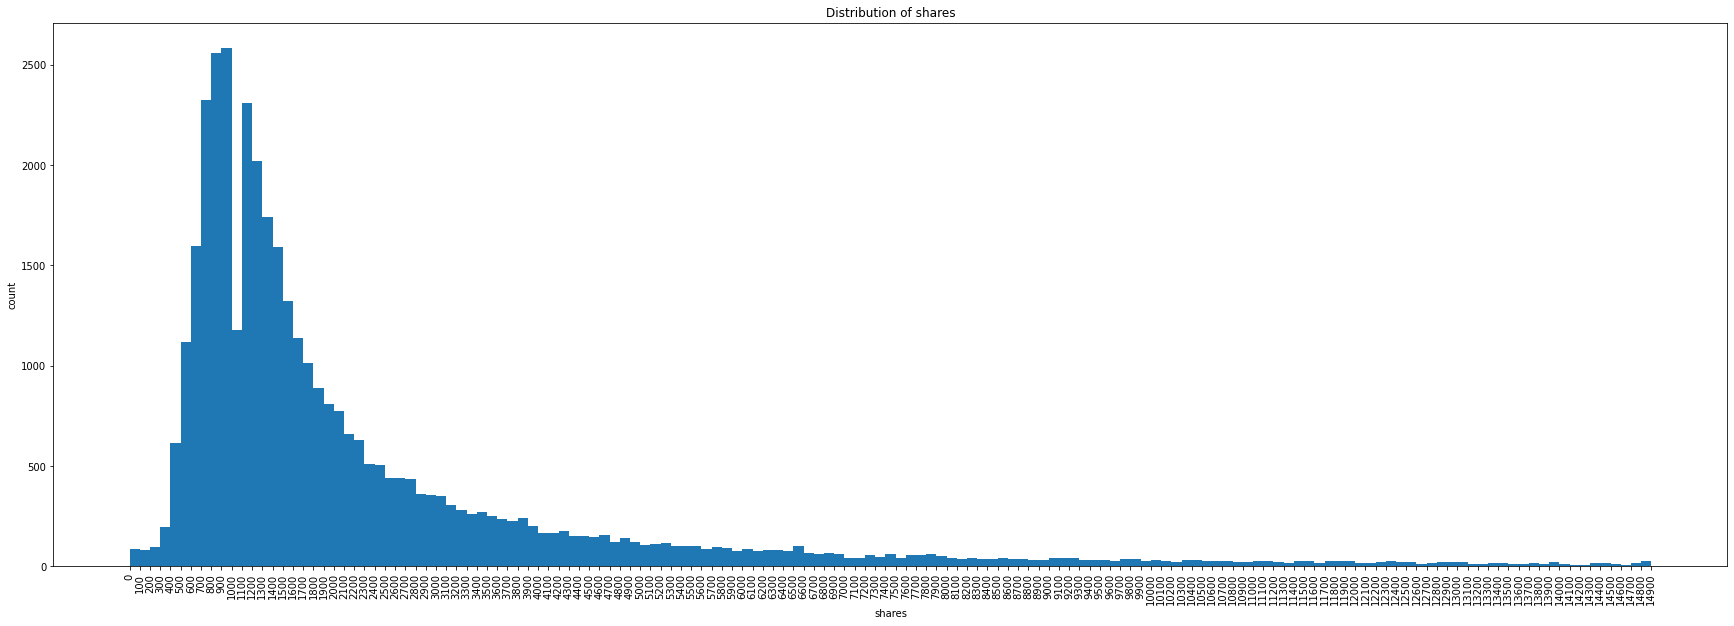

In [ ]:
# Plotting the Distribution of the dependant varible, shares.
plt.figure(figsize=(30,10))
bin_edges = np.arange(0, df_majority['shares'].max()+1, 100) 
plt.hist(data = df_majority, x = 'shares', bins = bin_edges)
plt.xticks(rotation=90)
desc(title = "Distribution of shares", xlabel='shares', ylabel='count', xticks1 = range(0, 15000, 100));

- We can tell most articles are in the range between 400 and 4000.
- Therefore, I decided to divide the number of shares into 3 levels:
    1. Extremely Bad: If the number of shares is lower than 400.
    2. Majority: If the number of shares is between 400 to 4000.
    3. Extremely Good: If the number of shares is more than 4000. 


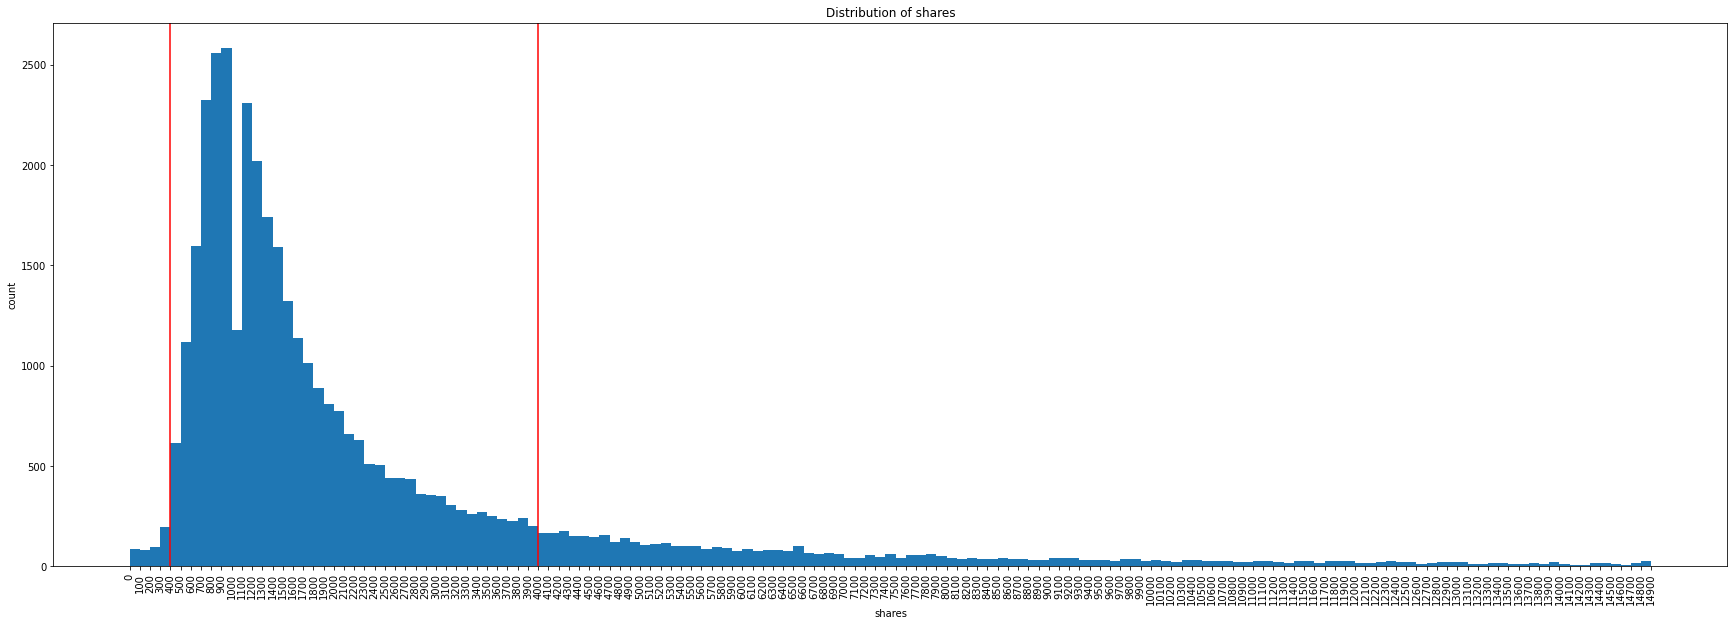

In [ ]:
# plot out the Distribution of the dependant varible, shares.
plt.figure(figsize=(30,10))
bin_edges = np.arange(0, df_majority['shares'].max()+1, 100) 
plt.hist(data = df_majority, x = 'shares', bins = bin_edges)
plt.xticks(rotation=90)
desc(title = "Distribution of shares", xlabel='shares', ylabel='count', xticks1 = range(0, 15000, 100))
plt.axvline(400, c ='r')
plt.axvline(4000, c ='r');

In [ ]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0, 400, 4000, 1000000]

# Labels for the 3 levels
bin_names = [0, 1, 2] # Name each popularity level category

# Creates acidity_levels column
df['shares_levels'] = pd.cut(df['shares'], bin_edges, labels=bin_names)

In [ ]:
# Checks the proportion of each group
df.groupby('shares_levels').shares.count()/df.shares.count()

shares_levels
0    0.011729
1    0.824412
2    0.163858
Name: shares, dtype: float64

- Extremely Bad: 1.17%
- Majority: 82.44%
- Extremely Good: 16.39%

## Combine one-hot encoding columns(data_channel-related and weekday-related into single columns

In [ ]:
# Create new columns to store the combined version of each.
df['weekday'] = None
df['data_channel'] = None

In [ ]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'lda_00',
       'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [ ]:
# Converting them into single columns
# 63 is the location where data_channel is at is the column list.
# 64 is the location where weekday is at is the column list.
for i in range(df.shape[0]):
    if df.iloc[i, 13] == 1:
        df.iloc[i, 63] = "lifestyle"
    elif df.iloc[i, 14] == 1:
        df.iloc[i, 63] = "entertainment"
    elif df.iloc[i, 15] == 1:
        df.iloc[i, 63] = "bus"
    elif df.iloc[i, 16] == 1:
        df.iloc[i, 63] = "socmed"
    elif df.iloc[i, 17] == 1:
        df.iloc[i, 63] = "tech "
    elif df.iloc[i, 18] == 1:
        df.iloc[i, 63] = "world"
        
    if df.iloc[i, 31] == 1:
        df.iloc[i, 62] = "monday"
    elif df.iloc[i, 32] == 1:
        df.iloc[i, 62] = "tuesday"
    elif df.iloc[i, 33] == 1:
        df.iloc[i, 62] = "wednesday"
    elif df.iloc[i, 34] == 1:
        df.iloc[i, 62] = "thursday"
    elif df.iloc[i, 35] == 1:
        df.iloc[i, 62] = "friday"
    elif df.iloc[i, 36] == 1:
        df.iloc[i, 62] = "saturday"
    elif df.iloc[i, 37] == 1:
        df.iloc[i, 62] = "sunday"

In [ ]:
# Checking if the Weekday Columns are converted successfully
df.groupby('weekday').url.count()

weekday
friday       5701
monday       6661
saturday     2453
sunday       2737
thursday     7267
tuesday      7390
wednesday    7435
Name: url, dtype: int64

In [ ]:
# Checking if the Data Channel Columns are converted successfully
df.groupby('data_channel').url.count()

data_channel
bus              6258
entertainment    7057
lifestyle        2099
socmed           2323
tech             7346
world            8427
Name: url, dtype: int64

In [ ]:
# Check for Null Values in the New Data Columns
df[["data_channel", "weekday"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data_channel  33510 non-null  object
 1   weekday       39644 non-null  object
dtypes: object(2)
memory usage: 619.6+ KB


In [ ]:
# Filling the Null Values with 'None'
df.data_channel = df.data_channel.fillna("none")

In [ ]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_levels,weekday,data_channel
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1,monday,entertainment
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1,monday,bus
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1,monday,bus
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1,monday,entertainment
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,1,monday,tech


# Random Forest Model Building

### Step 1: Convert the categorical columns into numeric formats.

In [ ]:
# Creating LabelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df.weekday=le.fit_transform(df.weekday)
df.data_channel=le.fit_transform(df.data_channel)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,shares_levels,weekday,data_channel
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1,1,1
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1,1,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1,1,0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1,1,1
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,1,1,5


### Step 2: Split the dataset into a training set(70%) and a  test set(30%)

In [ ]:
# Splitting the Dataset into Training and Testing Dataset
X=df[['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
      'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min',
      'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'data_channel',
      'weekday', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess',
      'weekday', 'is_weekend', 'lda_00', 'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
      'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words',
      'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
      'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
      'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']]
y=df['shares_levels']

# Split dataset into training set and test set into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

### Step 3: Feature Scaling

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Step 4: Build the model

In [ ]:
# Creating a Random Forest Classifier Model with 100 trees(default)
clf=RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

### Step 5: Test the model

In [ ]:
# Model Accuracy Calculation
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.821170337985539


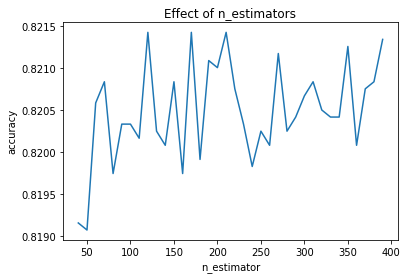

In [ ]:
# Try different numbers of n_estimators
estimators = np.arange(40, 400, 20)
accuracy = []

for n in estimators:
    clf.set_params(n_estimators=n)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.plot(estimators, accuracy)

It seems like the optimal number of estimators is around 120 and we will get an accuracy of nearly 83%.

# Optimizing the accuracy

### 1. Find out which accuracy is higher, using one hot encoding or not using it?

In [ ]:
# Here, we are not using the combined columns, data_channel and weekday. 
# Instead, we use the one-hot encoding version of each feature.
X=df[['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
      'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min',
      'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 
      'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed',
      'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
      'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'kw_avg_avg',
      'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday', 'is_weekend',
      'lda_00', 'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity', 'global_sentiment_polarity',
      'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words','rate_negative_words',
      'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity',
      'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity',
      'abs_title_subjectivity', 'abs_title_sentiment_polarity']]
y=df['shares_levels']

# Split dataset into training set and test set into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Create a Random Forest Classifier with 100 trees(default)
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)

In [ ]:
# calculate the accuracy using one_hot_encoding in different sizes of estimators.
estimators = np.arange(40, 400, 20)
accuracy_one_hot_encoding = []

for n in estimators:
    clf2.set_params(n_estimators=n)
    clf2.fit(X_train, y_train)
    y_pred=clf2.predict(X_test)
    accuracy_one_hot_encoding.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# line 1: Accuracy without using One-Hot Encoding
x1 = estimators
y1 = accuracy
# plotting the line 1 points 
plt.plot(x1, y1, label = "No One-Hot Encoding")
# line 1: Accuracy using One-Hot Encoding
x2 = estimators
y2 = accuracy_one_hot_encoding
# plotting the line 2 points 
plt.plot(x2, y2, label = "One-Hot Encoding")
plt.xlabel('n_estimator')
# Set the y axis label of the current axis.
plt.ylabel('accuracy')
# Set a title of the current axes.
plt.title('One-Hot Encoding vs. No One-Hot Encoding')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

It shows that the one using one-hot encoding got slightly better result, nearly 0.4% higher.

### 2. Find out which variable is noise to the dependant variable? Drop them to see if accuracy increases.

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, 
index = ['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 
        'data_channel', 'weekday',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday', 'is_weekend', 'lda_00',
       'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
      'abs_title_sentiment_polarity']).sort_values(ascending=False)
# index variables(features)

feature_imp

kw_avg_avg                      0.042737
kw_max_avg                      0.040273
kw_avg_max                      0.030917
lda_03                          0.030520
kw_avg_min                      0.030029
lda_02                          0.029792
lda_00                          0.029526
lda_04                          0.029026
lda_01                          0.028915
average_token_length            0.028701
self_reference_min_shares       0.028631
global_subjectivity             0.028609
kw_max_min                      0.027864
self_reference_avg_sharess      0.027849
avg_positive_polarity           0.027766
n_unique_tokens                 0.027377
n_tokens_content                0.027078
n_non_stop_unique_tokens        0.026858
global_rate_positive_words      0.025299
global_sentiment_polarity       0.025112
avg_negative_polarity           0.024193
self_reference_max_shares       0.024173
num_hrefs                       0.023682
kw_min_avg                      0.023494
global_rate_nega

In [ ]:
feature_imp.index

Index(['kw_avg_avg', 'kw_max_avg', 'kw_avg_max', 'lda_03', 'kw_avg_min',
       'lda_02', 'lda_00', 'lda_04', 'lda_01', 'average_token_length',
       'self_reference_min_shares', 'global_subjectivity', 'kw_max_min',
       'self_reference_avg_sharess', 'avg_positive_polarity',
       'n_unique_tokens', 'n_tokens_content', 'n_non_stop_unique_tokens',
       'global_rate_positive_words', 'global_sentiment_polarity',
       'avg_negative_polarity', 'self_reference_max_shares', 'num_hrefs',
       'kw_min_avg', 'global_rate_negative_words', 'rate_negative_words',
       'rate_positive_words', 'n_tokens_title', 'kw_min_max',
       'title_sentiment_polarity', 'num_imgs', 'max_negative_polarity',
       'min_negative_polarity', 'num_self_hrefs', 'title_subjectivity',
       'abs_title_sentiment_polarity', 'abs_title_subjectivity',
       'min_positive_polarity', 'weekday', 'weekday', 'num_keywords',
       'data_channel', 'max_positive_polarity', 'num_videos', 'kw_max_max',
       'kw_min_m

Since "n_non_stop_words" is the least important variable contributing the number of shares. Thus, we drop it to see if the accracy increases.

In [ ]:
X=df[['kw_avg_avg', 'kw_max_avg', 'lda_02', 'lda_01', 'lda_04', 'kw_avg_max',
       'kw_avg_min', 'lda_00', 'lda_03', 'average_token_length',
       'n_non_stop_unique_tokens', 'global_subjectivity', 'kw_max_min',
       'self_reference_min_shares', 'n_unique_tokens',
       'global_rate_positive_words', 'avg_positive_polarity',
       'global_sentiment_polarity', 'n_tokens_content',
       'self_reference_avg_sharess', 'global_rate_negative_words',
       'avg_negative_polarity', 'self_reference_max_shares',
       'rate_negative_words', 'rate_positive_words', 'num_hrefs', 'kw_min_avg',
       'n_tokens_title', 'kw_min_max', 'data_channel',
       'title_sentiment_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'num_self_hrefs', 'num_imgs',
       'title_subjectivity', 'min_positive_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'weekday', 'weekday',
       'max_positive_polarity', 'is_weekend', 'num_keywords', 'num_videos',
       'kw_max_max', 'kw_min_min']]  # Features
y=df['shares_levels']  # Labels


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Create a Random Forest Classifier with 100 trees(default)
clf3=RandomForestClassifier(n_estimators=100)
clf3.fit(X_train, y_train)
y_pred=clf3.predict(X_test)

In [ ]:
# calculate the accuracy using one_hot_encoding in different sizes of estimators.
estimators = np.arange(40, 400, 20)
accuracy_after_removing_noise = []

for n in estimators:
    clf3.set_params(n_estimators=n)
    clf3.fit(X_train, y_train)
    y_pred=clf3.predict(X_test)
    accuracy_after_removing_noise.append(metrics.accuracy_score(y_test, y_pred))

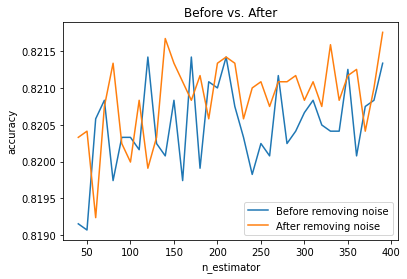

In [ ]:
# line 1: Accuracy without using One-Hot Encoding
x1 = estimators
y1 = accuracy
# plotting the line 1 points 
plt.plot(x1, y1, label = "Before removing noise")
# line 1: Accuracy using One-Hot Encoding
x2 = estimators
y2 = accuracy_after_removing_noise
# plotting the line 2 points 
plt.plot(x2, y2, label = "After removing noise")
plt.xlabel('n_estimator')
# Set the y axis label of the current axis.
plt.ylabel('accuracy')
# Set a title of the current axes.
plt.title('Before vs. After')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

After removing the noisy variables, it increase the accuracy slightly.

### Random Forest Model has an accuracy of 82.2%